# Linear Regression

With linear regressions we are trying to find the linear correlation between X and Y!

First, let us take a trip back to middle school, where we brush up on the definition of a simple straight line: y = mx + b, where m is the slope and b is the y-intercept. This would be the equation used to discover y, and we could rearrange it instead to discover x using basic algebraic principles: x = (y-b) / m.
Alright, so, our objective is to find the best-fit line. Not just a good-fit line, the best one! The definition of this line will be y = mx + b. The y is the answer (our other coordinate, or it could even be our "feature"), so we'll still be needing m (the slope) and b (y-intercept), since x could be any possible point along the x-axis, so it is already known.

Let's see what it means:

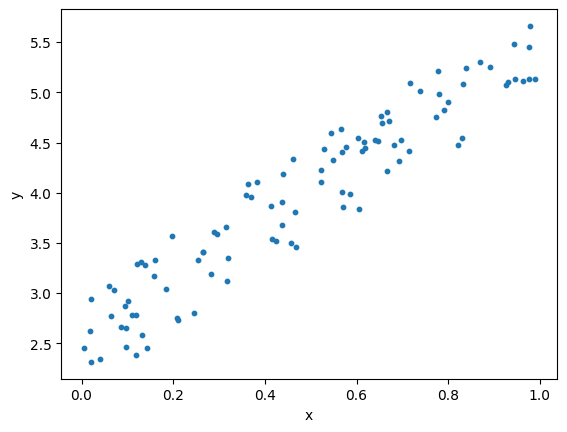

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
np.shape(y)

(100, 1)

## Implementing Linear Regression from scratch

The complete implementation of linear regression with gradient descent is given below.

In [4]:
# imports
import numpy as np


class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.
    
    Parameters
    ----------
    eta : float 
        Learning rate
    n_iterations : int
        No of passes over the training set
    Attributes
    ----------
    w_ : weights/ after fitting the model
    cost_ : total error of the model after each iteration
    """

    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations

    def cost_function(self, y_tilde, x, m, b):
        total_error = 0.0
        for i in range(len(y_tilde)):
            total_error += (y_tilde - m*x[i] + b)**2
        return total_error / len(y_tilde)

    def fit(self, x, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]

        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        return np.dot(x, self.w_)

In [5]:
# transform the feature vectors to include the bias term
# adding 1 to all the instances of the training set.
m = x.shape[0]
x_train = np.c_[np.ones((m, 1)), x]

lr = LinearRegressionUsingGD()
lr.fit(x_train,y)

In [6]:
print("Intercept:" + str(lr.w_[0]))
print("Slope    :" + str(lr.w_[1]))

Intercept:[2.58109277]
Slope    :[2.89114079]


### See the cost curve 

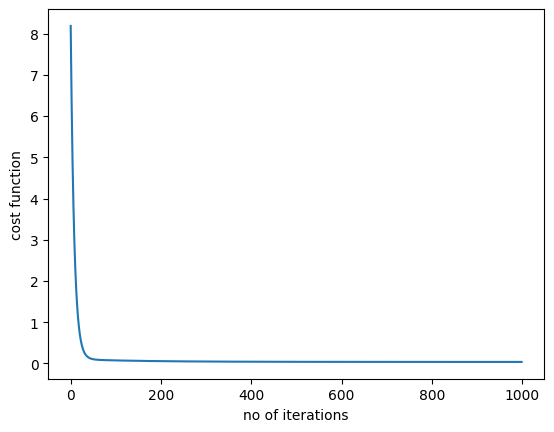

In [7]:
# plot costs
plt.plot(lr.cost_)
plt.xlabel('no of iterations')
plt.ylabel('cost function')
plt.show()

## Scikit-learn implementation

sckit-learn is a very powerful library for data-science. The complete code is given below

Slope: [[2.93655106]]
Intercept: [2.55808002]
Root mean squared error:  0.07623324582875009
R2 score:  0.9038655568672764


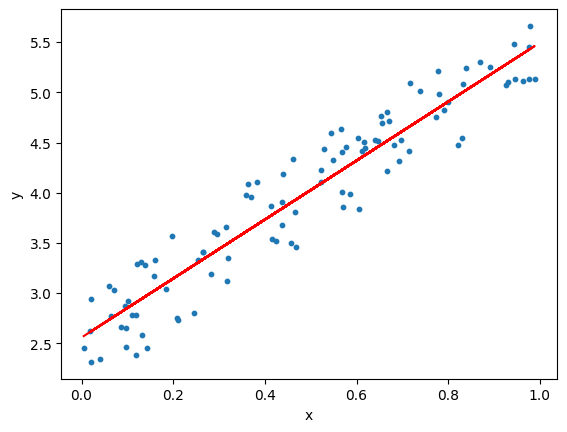

In [8]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()